<a href="https://colab.research.google.com/github/leekate/2020ctrc/blob/master/0808_total_CM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MULTI_IMAGE_CLASSIFICATION**

4가지의 이미지 분류

기본적인 방법은 단일 이미지 분류와 같다. 대신, 다중 이미지 분류이기 때문에 카테고리의 변화가 있다.


## 1번 train

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
'''!pip install hmmlearn==0.1.1

!pip uninstall keras
!pip install Keras==2.2.4

!pip uninstall tensorflow
!pip install tensorflow==1.13.1'''

  Created wheel for hmmlearn: filename=hmmlearn-0.1.1-cp36-cp36m-linux_x86_64.whl size=300622 sha256=653587452da7c6a81516bbbf968e920ecac5ff669d495b403ace18316db171e6
  Stored in directory: /root/.cache/pip/wheels/56/ab/ad/6356405fc02d541c101b7d723ebfaf94b33f7dbad4e0154e7f
Successfully built hmmlearn
Uninstalling Keras-2.4.3:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Keras-2.4.3.dist-info/*
    /usr/local/lib/python3.6/dist-packages/docs/*
    /usr/local/lib/python3.6/dist-packages/keras/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/docs/md_autogen.py
    /usr/local/lib/python3.6/dist-packages/docs/update_docs.py
Proceed (y/n)? y
  Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 317kB 10.3MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 


Uninstalling tensorflow-2.3.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.3.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.3.0
     |████████████████████████████████| 92.5MB 44kB/s 
     |████████████████████████████████| 368kB 47.9MB/s 
     |████████████████████████████████| 3.2MB 44.7MB/s 
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0


### 파일 읽어오기

In [1]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

caltech_dir = '/content/drive/My Drive/CTRC/train'
categories = ["1. Cancer","2. Precancer","3. Extra","4. Normal"]
nb_classes = len(categories)

image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
y = []


#카테고리별로 돌면서 label 먼저 0으로 초기화
#첫번째 idx에 1 넣어주기
#1 0 0 0 이면 cancer
#0 1 0 0 이면 precancer 이런식


for idx, cat in enumerate(categories): #cat은 뭘까 
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + cat #cat은 뭘까
    files = glob.glob(image_dir+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB") #이미지 RGB값으로 바꿔주고
        img = img.resize((image_w, image_h)) #resize하고
        data = np.asarray(img) #그 값을 numpy 라이브러리를 이용해 저장

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=321)

xy = (X_train, X_test, y_train, y_test)
np.save('/content/drive/My Drive/CTRC/train/multi_image_data.npy', xy)

print("ok", len(y))


1. Cancer  파일 길이 :  412
1. Cancer  :  /content/drive/My Drive/CTRC/train/1. Cancer/can_1.jpg
2. Precancer  파일 길이 :  150
2. Precancer  :  /content/drive/My Drive/CTRC/train/2. Precancer/precan_1.jpg
3. Extra  파일 길이 :  265
3. Extra  :  /content/drive/My Drive/CTRC/train/3. Extra/inf_1.jpg
4. Normal  파일 길이 :  1153
4. Normal  :  /content/drive/My Drive/CTRC/train/4. Normal/nor_147.jpg
4. Normal  :  /content/drive/My Drive/CTRC/train/4. Normal/nor_263_4..jpg
ok 1980


In [2]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
np.random.seed(3)

imageGenerator = ImageDataGenerator(rescale=1./255)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [3]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
np.random.seed(3)


#데이터가 충분하지 않아서
'''
testGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/train', target_size=(64, 64))
'''


#데이터가 충분하면 나누기
trainGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/train',
                                              target_size=(64,64),shuffle=False,
                                              subset='training')

validationGen = imageGenerator.flow_from_directory('/content/drive/My Drive/CTRC/train',
                                                  target_size=(64,64),shuffle=False,
                                                  subset='validation')

Found 3193 images belonging to 7 classes.
Found 0 images belonging to 7 classes.


In [4]:

from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

cls_index = ['1. Cancer', '2. Precancer','3. Extra','4. Normal']

imgs = trainGen.next()
arr = imgs[0][0]


img = array_to_img(arr).resize((128, 128))

### 학습하기

이제 numpy 데이터를 불러온다. 이거 가지고 학습!

In [5]:
import os, glob, numpy as np

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K


import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

X_train, X_test, y_train, y_test = np.load('/content/drive/My Drive/CTRC/train/multi_image_data.npy', allow_pickle=True)
print(X_train.shape)
print(X_train.shape[0])

(1386, 64, 64, 3)
1386


Using TensorFlow backend.


In [6]:
categories = ["1. Cancer","2. Precancer","3. Extra","4. Normal"]
nb_classes = len(categories)

#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

### CNN 모델 만들기 (Conv2D 이용)

In [7]:


with K.tf.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (7,7), padding="same", input_shape=X_train.shape[1:], activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    '''model.add(Dropout(0.25))'''
    # 3X3 크기의 컨볼루션 레이어를 32개의 필터수를 처음에 생성
    # 활성화 함수 relu
    # (64,64,3)의 튜플 값 가진다
    # Maxpooling2D를 통해 중요 값만 뽑아 작은 출력값 만든다

    
    model.add(Conv2D(64, (5,5), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    '''model.add(Dropout(0.25))'''

    model.add(Conv2D(128, (3,3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(256, (3,3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))


    model.add(Conv2D(512, (3,3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))


    model.add(Flatten()) 
    #CNN에서 컨볼루션 레이어나 맥스풀링을 거치면 주요 특징만 추출되어 학습됨
    
    #컨볼루션이나 맥스풀링은 주로 2차원을 다루지만
    #전결합층에 전달을 하기 위해서는 1차원으로 바꿔야하는데
    #이 때 Flatten사용
    model.add(Dense(256, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './model'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/multi_img_classification.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)
    
    

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         295168    
__________

In [9]:
history = model.fit(X_train, y_train, batch_size=7, epochs=30, 
                    validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])

Instructions for updating:
Use tf.cast instead.
Train on 1386 samples, validate on 594 samples
Epoch 1/30
1386/1386 [==============================] - 62s 45ms/step - loss: 1.1800 - acc: 0.5693 - val_loss: 1.0846 - val_acc: 0.5993

Epoch 00001: val_loss improved from inf to 1.08461, saving model to ./model/multi_img_classification.model
Epoch 2/30
1386/1386 [==============================] - 62s 45ms/step - loss: 1.1301 - acc: 0.5750 - val_loss: 1.0753 - val_acc: 0.5993

Epoch 00002: val_loss improved from 1.08461 to 1.07526, saving model to ./model/multi_img_classification.model
Epoch 3/30
1386/1386 [==============================] - 62s 45ms/step - loss: 1.1258 - acc: 0.5750 - val_loss: 1.0861 - val_acc: 0.5993

Epoch 00003: val_loss did not improve from 1.07526
Epoch 4/30
1386/1386 [==============================] - 62s 45ms/step - loss: 1.0876 - acc: 0.5779 - val_loss: 0.9861 - val_acc: 0.6162

Epoch 00004: val_loss improved from 1.07526 to 0.98607, saving model to ./model/multi_im

In [10]:
print("정확도 : %.2f " %(model.evaluate(X_test, y_test)[1]))

594/594 [==============================] - 7s 12ms/step
정확도 : 0.69 


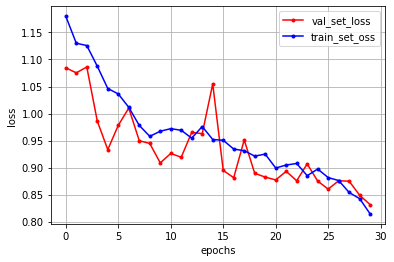

In [11]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

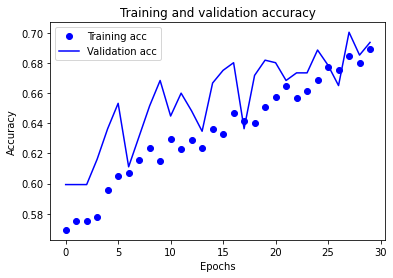

In [12]:
plt.clf() # 그래프를 초기화합니다.
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(x_len, acc, 'bo', label='Training acc')
plt.plot(x_len, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [13]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "/content/drive/My Drive/CTRC/train/multi_img_data/imgs_others_test"
image_w = 128
image_h = 128

pixels = image_h * image_w * 3


In [14]:
X = []
'''filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)         
    img = img.convert("RGB")
    img = img.resize((128,128))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)'''

X = np.array(X)
X = X.reshape(X.shape[0], 64,64,3)
model = load_model( './model/multi_img_classification.model')

f는 이미지가 있는 데이터 경로를 뜻합니다. 

위에서 files = glob.glob(caltech_dir+"/*.*")

에서 가져오는 데이터를 (이미지 데이터들이 files라는 리스트 변수에 들어갑니다.)

open해주는 것이죠.

 

즉, files = glob.glob(caltech_dir+"/*.*") 의 경로는 지우님께서 사용하고 있는 local 환경에서

image가 있는 경로로 맞춰주시면 됩니다.

*github host 이수진

## 2번 모델 예측하기

In [21]:
img=np.resize(img,(1,64,64,3))

'''#모델 평가
print("--Evaluate--")
scores=model.evaluate_generator(validationGen,steps=5)
print("%s:%.2f%%"%(model.metrics_names[1],scores[1]*100))'''


predicted_classes = model.predict_classes(X_test)



In [22]:
#훈련된 모델을 이용해 한 이미지에 대한 예측 만들기

# 테스트 세트에서 이미지 하나를 선택합니다
img=np.resize(img,(1,64,64,3))
img = X_test[0]

print(img.shape)


(64, 64, 3)


### 파일 비교해서 결과내기 

In [23]:
#해당 이미지 predict
prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0


print(X.shape)

(0, 64, 64, 3)


In [24]:

from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

cls_index = ['1. Cancer', '2. Precancer','3. Extra','4. Normal']

imgs = trainGen.next()
arr = imgs[0][0]


img = array_to_img(arr).resize((128, 128))

[0]
예측: 1. Cancer
Label:[0 0 0 1]


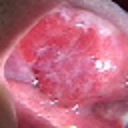

In [25]:

result = model.predict_classes(arr.reshape(1,64,64,3))

print(result)
print('예측: {}'.format(cls_index[result[0]]))
print("Label:" + str(y_test[0]) )
img


# np.argmax: 다차원 배열의 경우에 차원에 따라 가장 큰 값의 인덱스들을 반환
# format: 문자열에 포함된 대괄호 개수 보다 format안에 들어 있는 값의 수가 적으면 에러

### 혼동행렬


#### 0번 (유력)

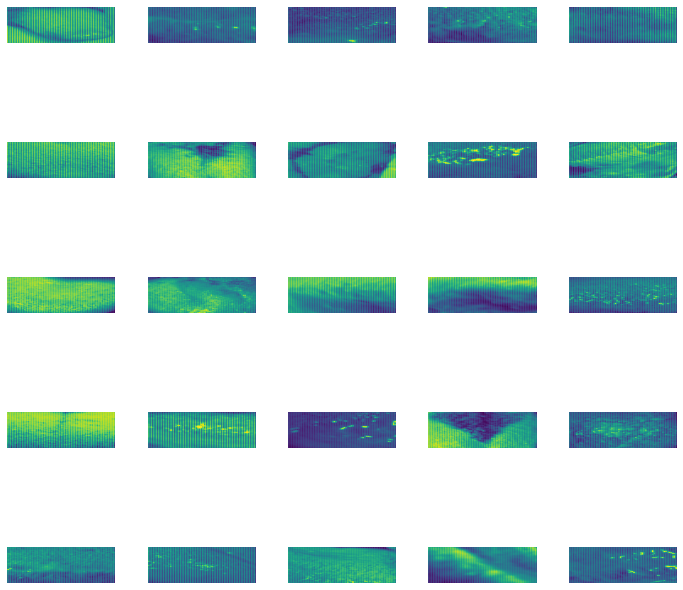

In [36]:
L = 5

W = 5



fig, axes = plt.subplots(L, W, figsize = (12, 12))

axes = axes.ravel()



for i in np.arange(0, L * W):

    axes[i].imshow(X_test[i].reshape(64,192))

    #axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))

    axes[i].axis('off')



plt.subplots_adjust(wspace=.3)

In [33]:
from sklearn.metrics import confusion_matrix



cm = confusion_matrix(y_test, 
                      predicted_classes)

plt.figure(figsize = (14, 10))

sns.heatmap(cm, annot = True)

ValueError: ignored

In [38]:
predicted_classes.shape

(594,)

#### 4번 (유력)

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt   
from sklearn.metrics import confusion_matrix
import pylab as pl



cm = confusion_matrix(y_test, predicted_classes)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(["1. Cancer","2. Precancer","3. Extra","4. Normal"])
ax.yaxis.set_ticklabels(["1. Cancer","2. Precancer","3. Extra","4. Normal"])

pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ValueError: ignored

#### 5번 (유력)

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt     

'''y_true = [1, 1, 0, 1, 0]
y_pred = [1, 1, 1, 0, 0]
'''
cm = confusion_matrix(y_test,predicted_classes )
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(["1. Cancer","2. Precancer","3. Extra","4. Normal"])
ax.yaxis.set_ticklabels(["1. Cancer","2. Precancer","3. Extra","4. Normal"])

ValueError: ignored

#### 선배코드


In [57]:
data = dataset.read_train(caltech_dir, 256, categories, validation_size=16)
cls_true = np.array(data.valid.cls)
cls_pred = np.array([classes[X] for x in cls_pred]) 

NameError: ignored

In [49]:
def plot_confusion_matrix(cls_pred):
    
    cls_true = data.valid.cls

    cm = confusion_matrix(y_true=cls_true, y_pred=cls_pred)
    
    print(cm)
    
    plt.matshow(cm)

    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    for i in range(0,4):
      for j in range(0,4):
        plt.text(j,i,str(cm[i][j]))
    plt.show()

In [ ]:
plot_confusion_matrix(cls_pred)